In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data set

path = r'/Users/peimei/09-2023 Instacart Basket Analysis'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_final.pkl'))
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,no_of_days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,count_dependants,fam_status,income,region,price_range,low_activity,age_flag,income_flag,department,name_day_of_week
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,3,married,40423,South,Mid-range product,max_order >=5,Young,Low income,beverages,Mon.
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,3,married,40423,South,Mid-range product,max_order >=5,Young,Low income,beverages,Tues.
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,3,married,40423,South,Mid-range product,max_order >=5,Young,Low income,beverages,Tues.
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,3,married,40423,South,Mid-range product,max_order >=5,Young,Low income,beverages,Wed.
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,3,married,40423,South,Mid-range product,max_order >=5,Young,Low income,beverages,Wed.


In [3]:
df.shape

(30959687, 38)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30959687 entries, 0 to 30959686
Data columns (total 38 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   order_id                      int64   
 1   user_id                       int64   
 2   order_number                  int64   
 3   order_day_of_week             int64   
 4   order_hour_of_day             int64   
 5   no_of_days_since_last_order   float64 
 6   product_id                    int64   
 7   add_to_cart_order             int64   
 8   reordered                     int64   
 9   product_name                  object  
 10  aisle_id                      int64   
 11  department_id                 int64   
 12  prices                        float64 
 13  merge_result                  category
 14  price_range_loc               object  
 15  busiest day                   object  
 16  busiest days                  object  
 17  busiest_period_of_day         object  
 18  

### Key Question 1

In [5]:
# Create a frequency table on 'no_of_days_since_last_order'

since_last_order_counts = df['no_of_days_since_last_order'].value_counts()
since_last_order_counts = since_last_order_counts.sort_index()

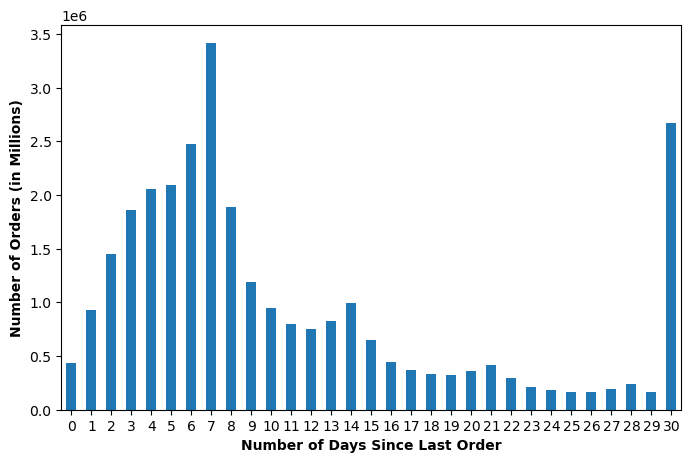

In [6]:
# Create a bar chart
bar_days_since_last_order = since_last_order_counts.plot.bar(figsize=(8, 5))

# Define a custom formatter function to round values to zero decimal points
from matplotlib.ticker import FuncFormatter

def round_to_integer(x, pos):
    return f'{int(round(x))}'  # Round to the nearest integer and format as a string

# Apply the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(round_to_integer))

plt.xlabel("Number of Days Since Last Order" , fontweight = 'bold')
plt.ylabel("Number of Orders (in Millions)" , fontweight = 'bold')
plt.xticks(rotation = 0)

plt.show()

In [7]:
# Export viz

bar_days_since_last_order.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10_Visualizations', 'bar_days_since_last_order.png'))

### Answer: The largest cluster of orders are placed 7 days after their previous orders. Second largest cluster are after 30 days. This indicates that most customers tend to return weekly or monthly. 

### Key Question 2

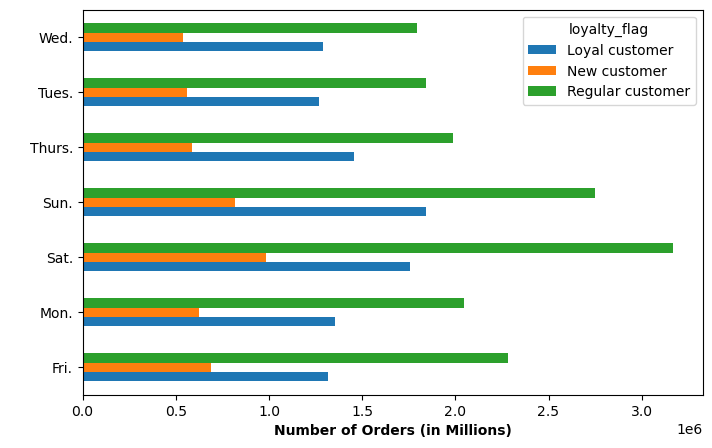

In [8]:
# Create a crosstab between name_day_of_week and loyalty_flag
cross_day_loyal = pd.crosstab(df['name_day_of_week'], df['loyalty_flag'], dropna = False)

# Create a horizontal bar chart
bar_cross_day_loyal = cross_day_loyal.plot.barh(figsize=(8, 5))

plt.xlabel('Number of Orders (in Millions)', fontweight='bold')
plt.ylabel(' ')

plt.show()

In [9]:
# Export viz

bar_cross_day_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10_Visualizations', 'bar_cross_day_loyal.png'))

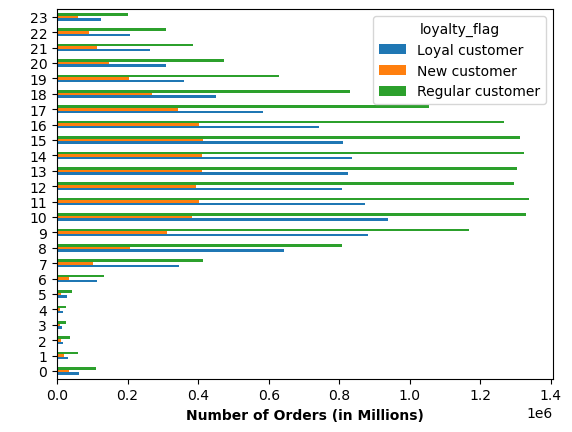

In [10]:
# Create a crosstab between order_hour_of_day and loyalty_flag
cross_hour_loyal = pd.crosstab(df['order_hour_of_day'], df['loyalty_flag'], dropna = False)

# Create a horizontal bar chart
bar_cross_hour_loyal = cross_hour_loyal.plot.barh()

plt.xlabel('Number of Orders (in Millions)', fontweight='bold')
plt.ylabel(' ')

plt.show()

In [11]:
# Export viz

bar_cross_hour_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10_Visualizations', 'bar_cross_hour_loyal.png'))

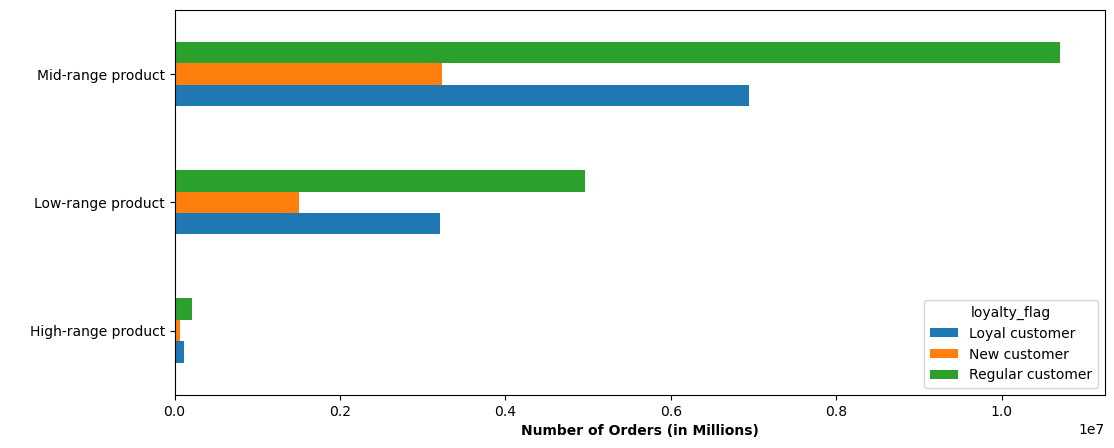

In [12]:
# Create a crosstab between price_range and loyalty_flag
cross_price_loyal = pd.crosstab(df['price_range'], df['loyalty_flag'], dropna = False)

# Create a horizontal bar chart
bar_cross_price_loyal = cross_price_loyal.plot.barh(figsize=(12, 5))

plt.xlabel('Number of Orders (in Millions)', fontweight='bold')
plt.ylabel(' ')

plt.show()

In [13]:
# Export viz

bar_cross_price_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10_Visualizations', 'bar_cross_price_loyal.png'))

### Answer: No differences are found in terms of time of purchase / day of purchase / price-range of product.

### Key Question 3

In [14]:
region_counts = df['region'].value_counts()
region_counts

South        10309442
West          7926057
Midwest       7260306
Northeast     5463882
Name: region, dtype: int64

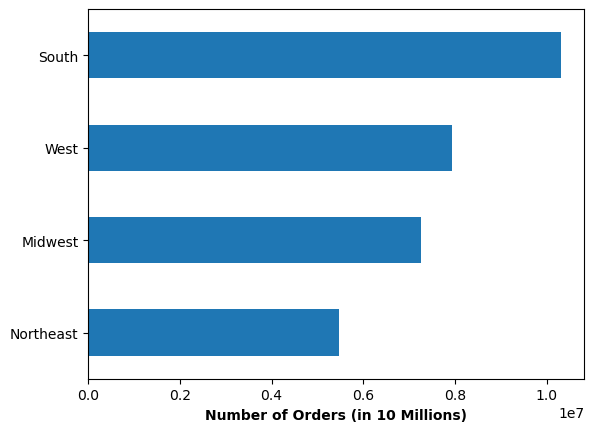

In [15]:
# Create a bar chart of regions

region_counts = df['region'].value_counts()
# Sort the DataFrame in descending order
region_counts = region_counts.sort_values(ascending = True) 

bar_region_counts = region_counts.plot.barh()

plt.xlabel('Number of Orders (in 10 Millions)', fontweight = 'bold')
plt.ylabel('', fontweight = 'bold')
plt.title('')
plt.show()

In [16]:
# Export viz

bar_region_counts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10_Visualizations', 'bar_region_counts.png'))

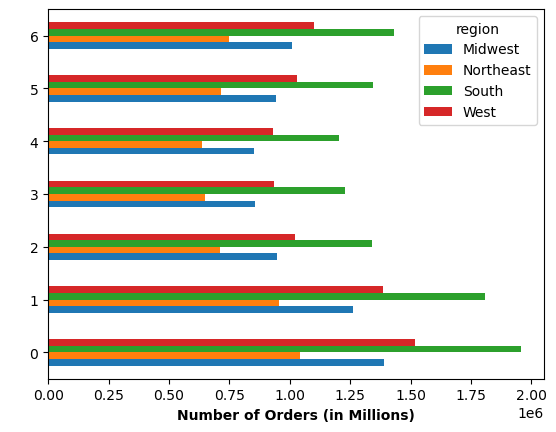

In [17]:
# Create a crosstab between order_day_of_week and loyalty_flag
cross_region_day = pd.crosstab(df['order_day_of_week'], df['region'], dropna = False)

# Create a horizontal bar chart
bar_cross_region_day = cross_region_day.plot.barh()

plt.xlabel('Number of Orders (in Millions)', fontweight='bold')
plt.ylabel(' ')

plt.show()

In [18]:
# Export viz

bar_cross_region_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10_Visualizations', 'bar_cross_region_day.png'))

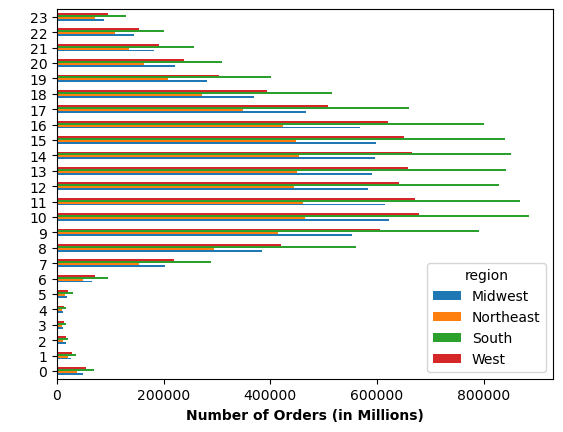

In [19]:
# Create a crosstab between order_hour_of_day and loyalty_flag
cross_region_hour = pd.crosstab(df['order_hour_of_day'], df['region'], dropna = False)

# Create a horizontal bar chart
bar_cross_region_hour = cross_region_hour.plot.barh()

plt.xlabel('Number of Orders (in Millions)', fontweight='bold')
plt.ylabel(' ')

plt.show()

In [20]:
# Export viz

bar_cross_region_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10_Visualizations', 'bar_cross_region_hour.png'))

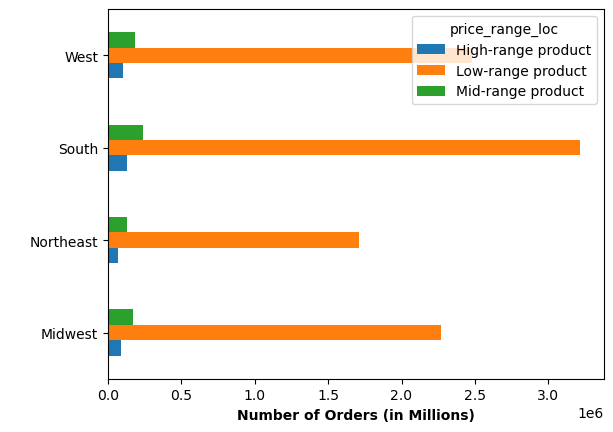

In [21]:
# Create a crosstab between price_range and loyalty_flag
cross_region_price = pd.crosstab(df['region'], df['price_range_loc'], dropna = False)

# Create a horizontal bar chart
bar_cross_region_price = cross_region_price.plot.barh()

plt.xlabel('Number of Orders (in Millions)', fontweight='bold')
plt.ylabel(' ')

plt.show()

In [22]:
# Export viz

bar_cross_region_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10_Visualizations', 'bar_cross_region_price.png'))

### Answer: No differences are found in terms of day of purchase / time of purchase / price-range of product / top 5 best-selling departments. However, the age group composition of our customers varies across the regions. Namely, there are more young customers than old customers in South and Midwest.  in West and Norteast, it is the opposite.

### Key Quetion 4

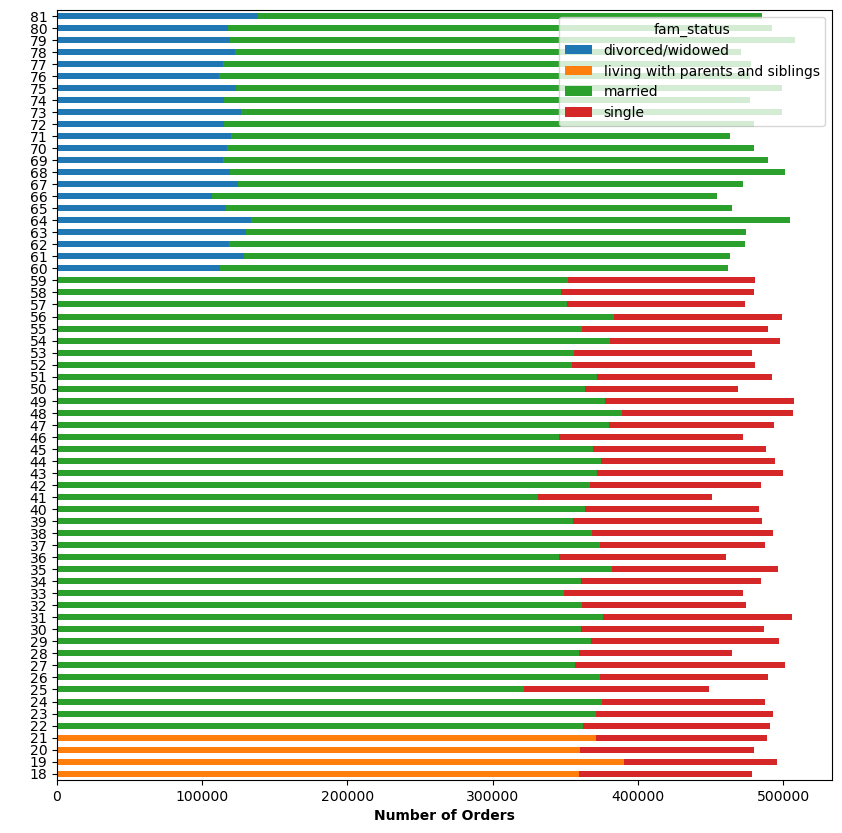

In [23]:
# Create a crosstab between 
cross_age_fam = pd.crosstab(df['age'], df['fam_status'], dropna = False)

# Create a horizontal bar chart
bar_cross_age_fam = cross_age_fam.plot.barh(stacked = True, figsize = (10,10))

plt.xlabel('Number of Orders', fontweight='bold')
plt.ylabel(' ')

plt.show()

In [24]:
# Export viz

bar_cross_age_fam.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10_Visualizations', 'bar_cross_age_fam.png'))

### Answer: By far, married people are the prevailing customer group from the age of 22 and onwards. Single people, both young and middle-aged, form the second largest group, followed by young adults living with parents and siblings and divorced/widowed people of an old age.


### Key Quetion 5

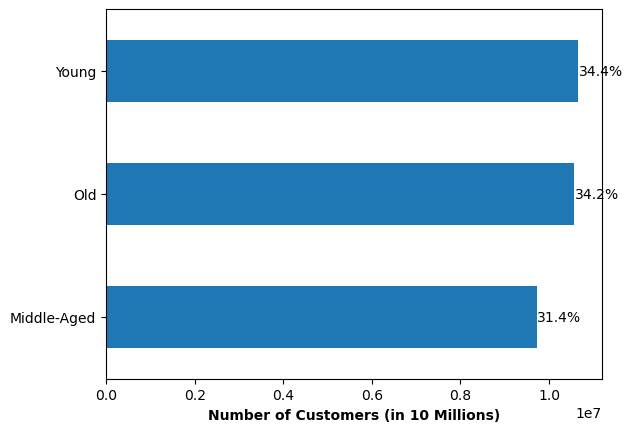

In [25]:
# Create a bar chart of regions
age_group_counts = df['age_flag'].value_counts()

# Sort the DataFrame in descending order
age_group_counts = age_group_counts.sort_values(ascending = True) 
bar_age_group_counts = age_group_counts.plot.barh()

# Add percentages to each bar
total = age_group_counts.sum()
for index, value in enumerate(age_group_counts):
    percentage = (value / total) * 100
    plt.text(value, index, f'{percentage:.1f}%', ha='left', va='center')

plt.xlabel('Number of Customers (in 10 Millions)', fontweight = 'bold')
plt.ylabel('', fontweight = 'bold')
plt.title('')
plt.show()

In [26]:
# Export viz

bar_age_group_counts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10_Visualizations', 'bar_age_group_counts.png'))

In [27]:
df['fam_status'].value_counts()

married                             21740200
single                               5093677
divorced/widowed                     2644831
living with parents and siblings     1480979
Name: fam_status, dtype: int64

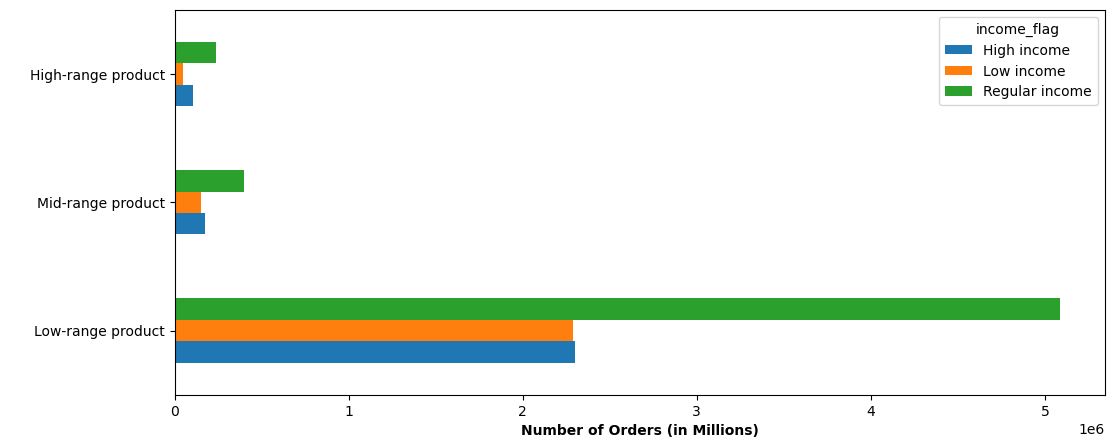

In [28]:
# Create a crosstab
desired_order = ['Low-range product', 'Mid-range product', 'High-range product']
cross_price_income = pd.crosstab(df['price_range_loc'], df['income_flag'], dropna = False)
cross_price_income = cross_price_income.reindex(desired_order)

# Create a horizontal bar chart
bar_cross_price_income = cross_price_income.plot.barh(figsize=(12, 5))

plt.xlabel('Number of Orders (in Millions)', fontweight='bold')
plt.ylabel(' ')

plt.show()

In [29]:
# Export viz

bar_cross_price_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10_Visualizations', 'bar_cross_price_income.png'))

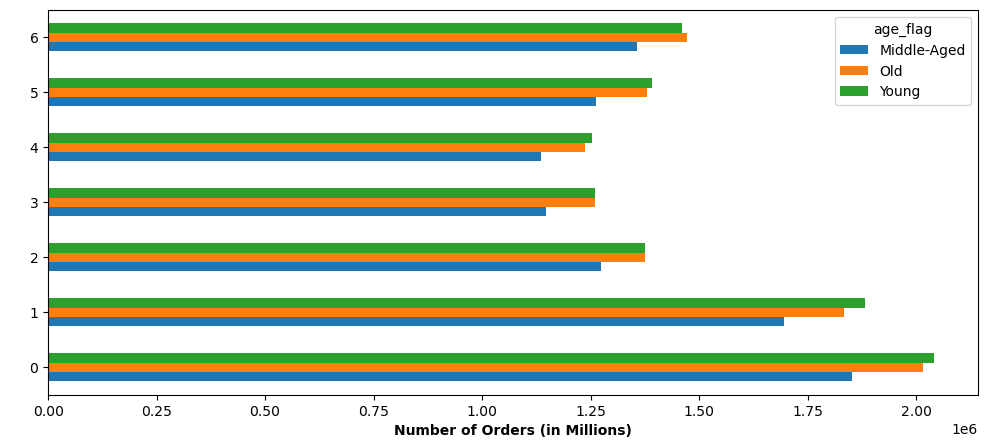

In [30]:
# Create a crosstab
cross_price_income = pd.crosstab(df['order_day_of_week'], df['age_flag'], dropna = False)
# cross_price_income = cross_price_income.reindex(desired_order)

# Create a horizontal bar chart
bar_cross_price_income = cross_price_income.plot.barh(figsize=(12, 5))

plt.xlabel('Number of Orders (in Millions)', fontweight='bold')
plt.ylabel(' ')

plt.show()

In [31]:
# Create a subset for orders of baby products
df_babies = df[df['department'] == 'babies']
df_babies.shape

(410392, 38)

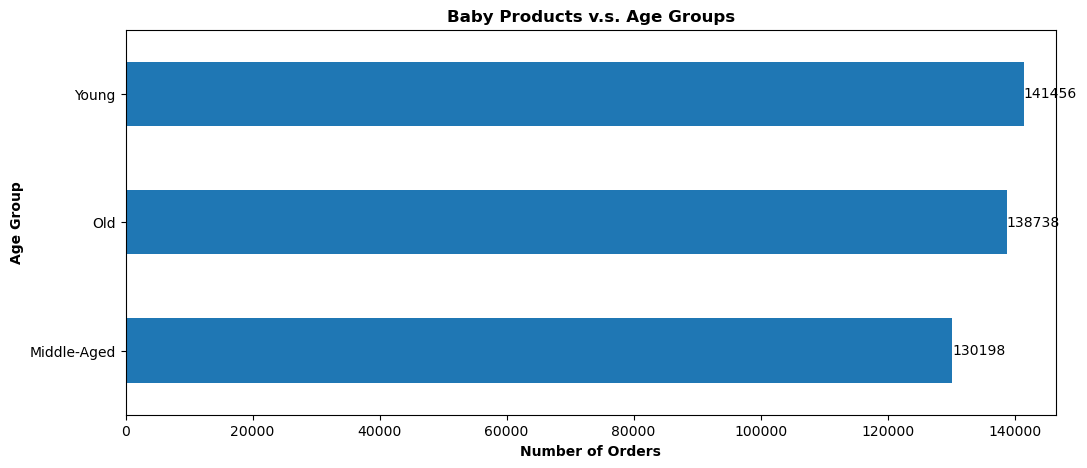

In [32]:
import matplotlib.pyplot as plt

# Create a bar chart of regions
babies_age_counts = df_babies['age_flag'].value_counts()

# Sort the DataFrame in descending order
babies_age_counts = babies_age_counts.sort_values(ascending=True)

bar_babies_age_counts = babies_age_counts.plot.barh(figsize=(12, 5))

# Add data labels (number of orders) to each bar
for index, value in enumerate(babies_age_counts):
    plt.text(value, index, f'{value}', ha='left', va='center')

plt.xlabel('Number of Orders', fontweight='bold')
plt.ylabel('Age Group', fontweight='bold')
plt.title('Baby Products v.s. Age Groups', fontweight='bold')
plt.xlim(0, babies_age_counts.max() + 5000)  # Adjust the x-axis limit
plt.show()


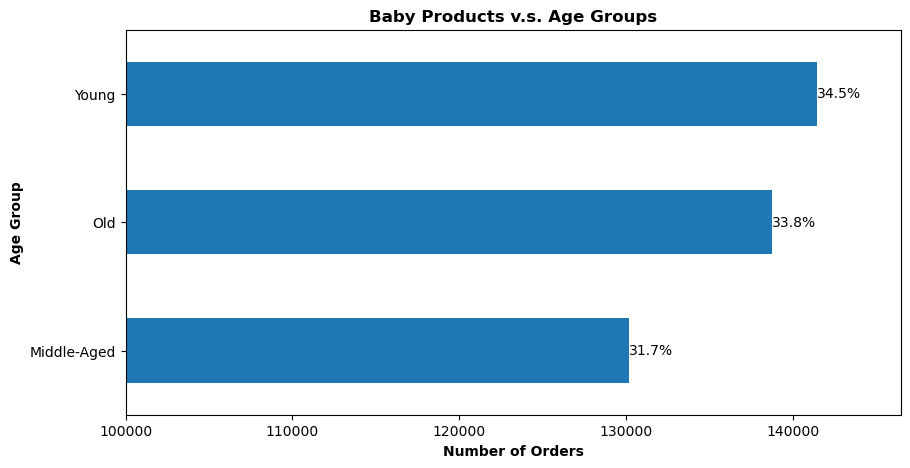

In [33]:
# Create a bar chart of regions
babies_age_counts = df_babies['age_flag'].value_counts()

# Sort the DataFrame in descending order
babies_age_counts = babies_age_counts.sort_values(ascending=True)

bar_babies_age_counts = babies_age_counts.plot.barh(figsize=(10,5))

# Add percentages to each bar
total = babies_age_counts.sum()
for index, value in enumerate(babies_age_counts):
    percentage = (value / total) * 100
    plt.text(value, index, f'{percentage:.1f}%', ha='left', va='center')

plt.xlabel('Number of Orders', fontweight='bold')
plt.ylabel('Age Group', fontweight='bold')
plt.title('Baby Products v.s. Age Groups', fontweight='bold')
plt.xlim(100000, babies_age_counts.max() + 5000)  # Adjust the x-axis limit
plt.show()


In [34]:
# Export viz

bar_babies_age_counts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10_Visualizations', 'bar_babies_age_counts.png'))

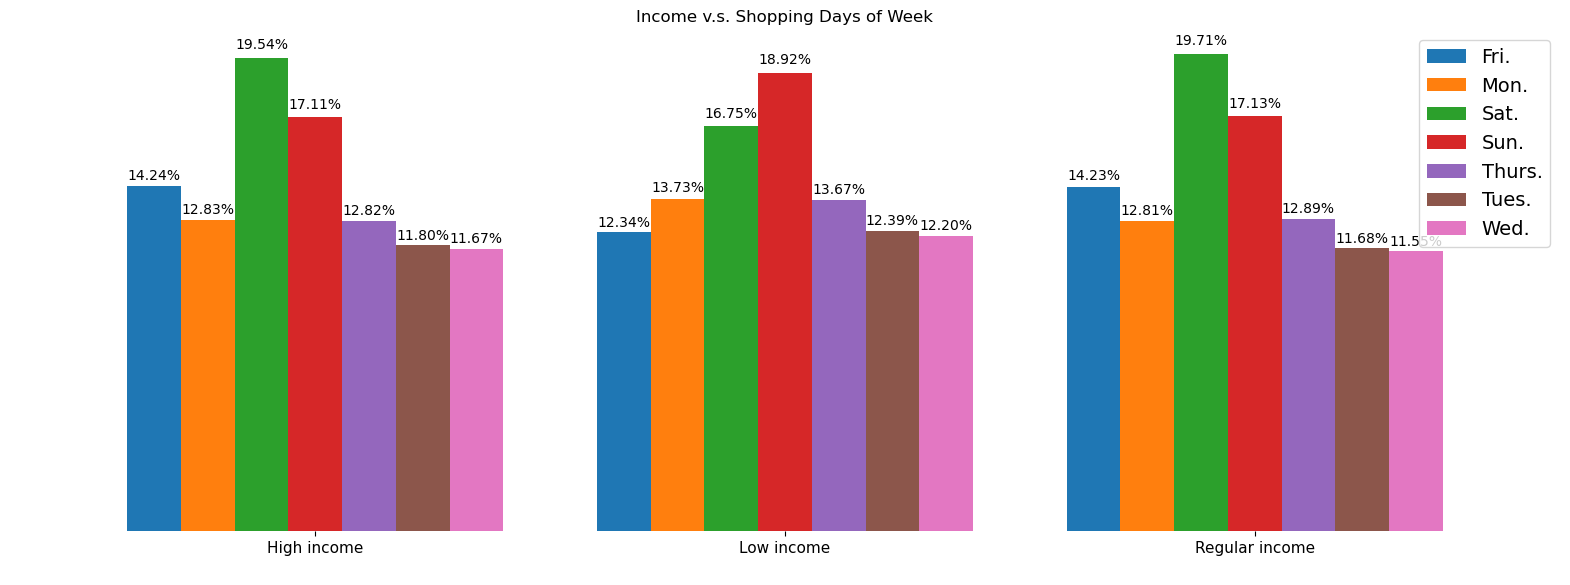

In [35]:
# Create a crosstab
cross_income_day = pd.crosstab(df['income_flag'], df['name_day_of_week'], dropna=False)

# Normalize result
cross_income_day_pct = cross_income_day.div(cross_income_day.sum(1), axis=0)

ax = cross_income_day_pct.plot(kind='bar',figsize=(20,6.5),width = 0.8,edgecolor=None)
plt.legend(labels=cross_income_day.columns,fontsize= 14)
plt.title("Income v.s. Shopping Days of Week")

plt.xticks(fontsize=11, rotation = 0)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])
plt.xlabel(' ')

# Add this loop to add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center')

In [36]:
# Export viz

ax.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10_Visualizations', 'bar_cross_income_day.png'))

In [37]:
df_alc = df[df['department'] == 'alcohol']
df_alc.shape

(144627, 38)

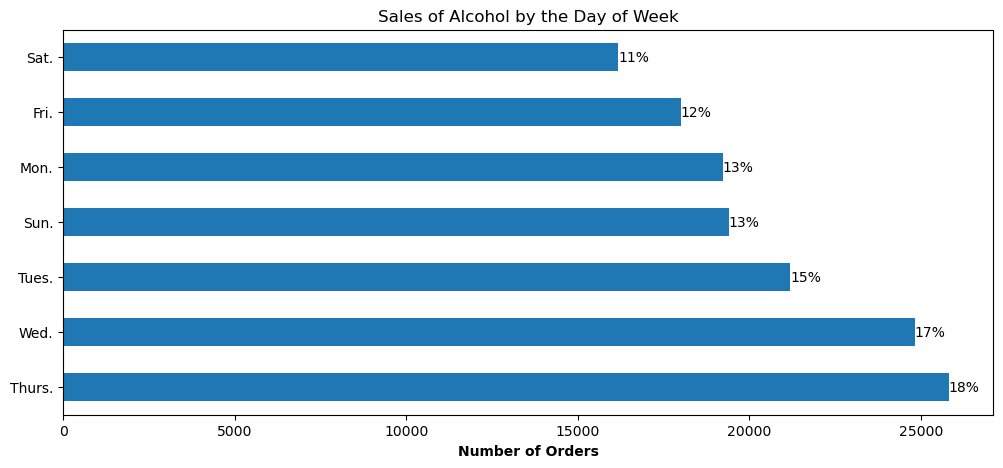

In [38]:
# Create a bar chart of regions
alc_day_counts = df_alc['name_day_of_week'].value_counts()

# Sort the DataFrame in descending order
bar_alc_day_counts = alc_day_counts.plot.barh(figsize=(12,5))

# # Add percentages to each bar
total = alc_day_counts.sum()
for index, value in enumerate(alc_day_counts):
    percentage = (value / total) * 100
    plt.text(value, index, f'{percentage:.0f}%', ha='left', va='center')

plt.xlabel('Number of Orders', fontweight = 'bold')
plt.ylabel('', fontweight = 'bold')
plt.title('Sales of Alcohol by the Day of Week')
plt.show()

In [39]:
# Export viz

bar_alc_day_counts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10_Visualizations', 'bar_alc_day_counts.png'))